### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 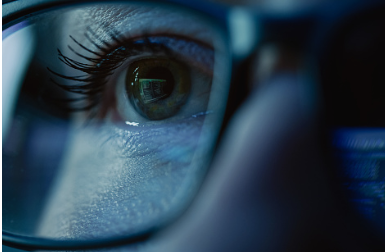 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from PIL import Image
import shutil

In [3]:
# Paths
base_dir = r'C:\Users\Atul Goswami\Desktop\ML Course Resourses\Assignment\Assignment - Image classification using CNN\glasses'
with_glasses_dir = os.path.join(base_dir, 'glasses')
without_glasses_dir = os.path.join(base_dir, 'no_glasses')

# Create train, val, test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for subset in ['train', 'val', 'test']:
    os.makedirs(os.path.join(train_dir, 'glasses'), exist_ok=True)
    os.makedirs(os.path.join(train_dir, 'no_glasses'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'glasses'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'no_glasses'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'glasses'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'no_glasses'), exist_ok=True)

# Split Data
def split_and_copy(src_dir, dest_dir, class_name):
    images = os.listdir(src_dir)
    train, temp = train_test_split(images, test_size=0.4, random_state=42)  # 60% train, 40% temp
    val, test = train_test_split(temp, test_size=0.5, random_state=42)     # 20% val, 20% test

    # Copy files to respective directories
    for img in train:
        shutil.copy(os.path.join(src_dir, img), os.path.join(dest_dir, 'train', class_name, img))
    for img in val:
        shutil.copy(os.path.join(src_dir, img), os.path.join(dest_dir, 'val', class_name, img))
    for img in test:
        shutil.copy(os.path.join(src_dir, img), os.path.join(dest_dir, 'test', class_name, img))

# Apply for each class
split_and_copy(with_glasses_dir, base_dir, 'glasses')
split_and_copy(without_glasses_dir, base_dir, 'no_glasses')

print("Dataset successfully split and organized.")


Dataset successfully split and organized.


In [4]:
# Load images and labels
def load_images_and_labels(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).resize((128, 128))
            images.append(np.array(img))
            labels.append(label)
    return images, labels

with_glasses_images, with_glasses_labels = load_images_and_labels(with_glasses_dir, 1)
without_glasses_images, without_glasses_labels = load_images_and_labels(without_glasses_dir, 0)

# Combine data and split into train, validation, and test sets
images = np.array(with_glasses_images + without_glasses_images)
labels = np.array(with_glasses_labels + without_glasses_labels)

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize images and convert labels to categorical
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

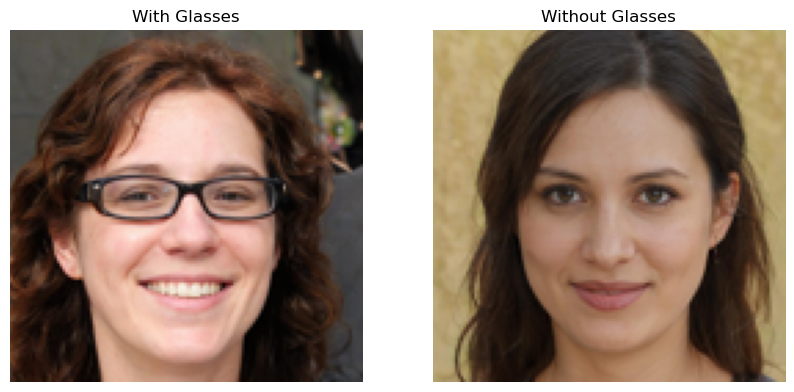

In [5]:
# Visualize the Dataset
# Display sample images from each class
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X_train[np.argmax(y_train, axis=1) == 1][0])
axes[0].set_title("With Glasses")
axes[0].axis('off')

axes[1].imshow(X_train[np.argmax(y_train, axis=1) == 0][0])
axes[1].set_title("Without Glasses")
axes[1].axis('off')
plt.show()

In [6]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Atul Goswami\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the Model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 663ms/step - accuracy: 0.6998 - loss: 1.4510 - val_accuracy: 0.7647 - val_loss: 0.5268
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.5012 - loss: 1.2306 - val_accuracy: 0.7647 - val_loss: 0.5622
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.6658 - loss: 0.7566 - val_accuracy: 0.7647 - val_loss: 0.6386
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.6998 - loss: 0.9316 - val_accuracy: 0.7647 - val_loss: 0.4976
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.6867 - loss: 0.6050 - val_accuracy: 0.7647 - val_loss: 0.5283
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.7649 - loss: 0.5362 - val_accuracy: 0.7647 - val_loss: 0.4842
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.7520 - loss: 0.4677 - val_accuracy: 0.7647 - val_loss: 0.4274
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7441 - loss: 0.4599 - val_accuracy: 0.8235 - val_loss:

In [8]:
# Step 6: Evaluate the Model
# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8333 - loss: 0.5168
Test Accuracy: 83.33%


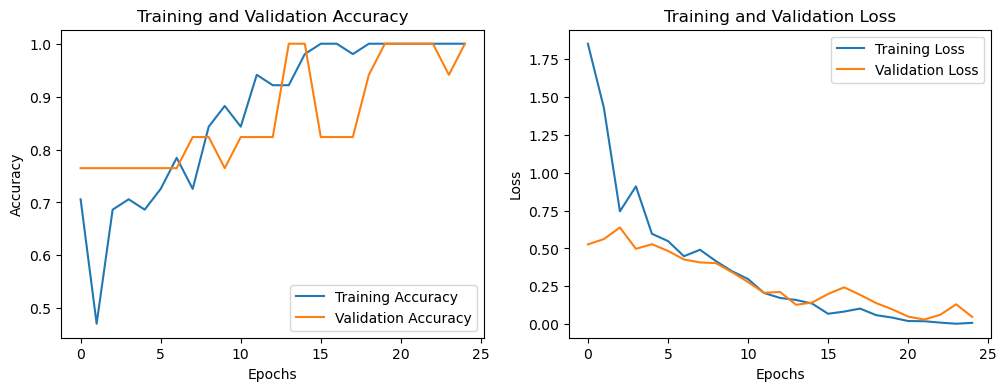

In [9]:
#Visualize Training Performance
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step

Classification Report:

                 precision    recall  f1-score   support

Without Glasses       1.00      0.57      0.73         7
   With Glasses       0.79      1.00      0.88        11

       accuracy                           0.83        18
      macro avg       0.89      0.79      0.80        18
   weighted avg       0.87      0.83      0.82        18



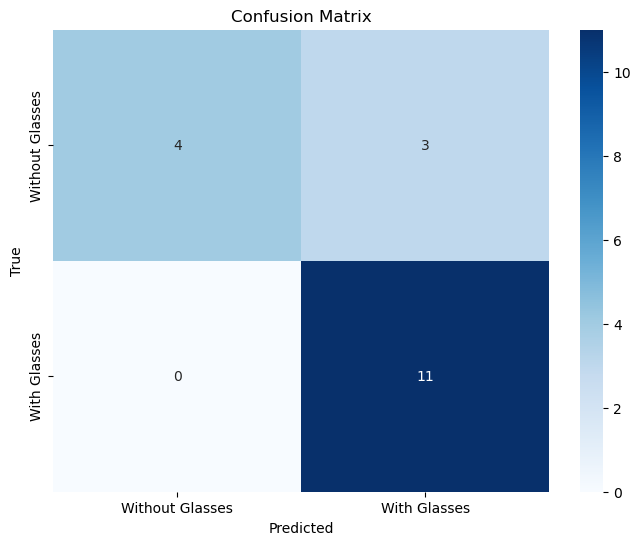

In [10]:
#Generate Classification Report and Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=['Without Glasses', 'With Glasses']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Without Glasses', 'With Glasses'], yticklabels=['Without Glasses', 'With Glasses'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [11]:
# Save the Model
model.save('glasses_classification_model.h5')
print("Model saved successfully!")


Model saved successfully!
